In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from torch import nn
import torch.nn.functional as F
from sklearn.preprocessing import MinMaxScaler
import warnings

In [2]:
df = pd.read_csv("C:\\Datasets\\GOLD\\LBMA-GOLD.csv")

In [3]:
df.head()

,Date,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
0,2023-02-24,1824.10,1810.95,1517.29,1516.13,1722.13,1717.87
1,2023-02-23,1826.95,1826.05,1518.01,1515.07,1724.64,1721.97
2,2023-02-22,1833.45,1835.75,1518.46,1516.33,1723.63,1723.03
3,2023-02-21,1833.20,1836.85,1516.42,1519.26,1719.91,1723.70
4,2023-02-20,1844.20,1845.80,1533.27,1532.94,1725.99,1726.19


In [4]:
df.shape

(13939, 7)

In [5]:
df.isnull().sum()

Date            0
USD (AM)        1
USD (PM)      147
GBP (AM)       11
GBP (PM)      158
EURO (AM)    7837
EURO (PM)    7884
dtype: int64

In [6]:
df['USD(AM)'] = df['USD (AM)'].fillna(df['USD (AM)'].mean())
df['USD(PM)'] = df['USD (AM)'].fillna(df['USD (PM)'].mean())
df['GBP(AM)'] = df['GBP (AM)'].fillna(df['GBP (AM)'].mean())
df['GBP(PM)'] = df['GBP (PM)'].fillna(df['GBP (PM)'].mean())
df['EURO (AM)'] = df['EURO (AM)'].fillna(df['EURO (AM)'].mean())
df['EURO (PM)'] = df['EURO (PM)'].fillna(df['EURO (PM)'].mean())

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df['Date']

0       2023-02-24
1       2023-02-23
2       2023-02-22
3       2023-02-21
4       2023-02-20
           ...    
13934   1968-01-08
13935   1968-01-05
13936   1968-01-04
13937   1968-01-03
13938   1968-01-02
Name: Date, Length: 13939, dtype: datetime64[ns]

In [9]:
df.dtypes

Date         datetime64[ns]
USD (AM)            float64
USD (PM)            float64
GBP (AM)            float64
GBP (PM)            float64
EURO (AM)           float64
EURO (PM)           float64
USD(AM)             float64
USD(PM)             float64
GBP(AM)             float64
GBP(PM)             float64
dtype: object

In [10]:
print(f"The last date for our study is {df['Date'].head(5)} and the first date is {df['Date'].tail(5)}")

The last date for our study is 0   2023-02-24
1   2023-02-23
2   2023-02-22
3   2023-02-21
4   2023-02-20
Name: Date, dtype: datetime64[ns] and the first date is 13934   1968-01-08
13935   1968-01-05
13936   1968-01-04
13937   1968-01-03
13938   1968-01-02
Name: Date, dtype: datetime64[ns]


In [11]:
df.describe()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM),USD(AM),USD(PM),GBP(AM),GBP(PM)
count,13938.000000,13792.000000,13928.000000,13781.000000,13939.000000,13939.000000,13939.000000,13939.000000,13939.000000,13939.000000
mean,606.527419,607.869120,398.128216,399.061625,849.036624,848.735233,606.527419,606.527516,398.128216,399.061625
std,521.518733,521.109568,387.813587,387.669586,299.688184,298.543417,521.500024,521.500024,387.660524,385.466028
min,34.770000,34.750000,14.485000,14.477000,237.334000,236.708000,34.770000,34.770000,14.485000,14.477000
25%,283.712500,284.387500,179.305000,179.518000,849.036624,848.735233,283.725000,283.725000,179.376000,180.231000
50%,385.150000,385.275000,238.194500,238.271000,849.036624,848.735233,385.150000,385.150000,238.233000,239.760000
75%,943.687500,945.250000,599.835500,602.578000,849.036624,848.735233,943.625000,943.625000,598.881000,580.799000
max,2061.500000,2067.150000,1586.210000,1570.410000,1849.310000,1870.220000,2061.500000,2061.500000,1586.210000,1570.410000


In [12]:
df.corr()
# There is a higher corerlation between the 3  currencies because of codependency?

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM),USD(AM),USD(PM),GBP(AM),GBP(PM)
USD (AM),1.000000,0.999953,0.984304,0.984218,0.663406,0.660952,1.000000,1.000000,0.983900,0.978202
USD (PM),0.999953,1.000000,0.984243,0.984265,0.664567,0.664786,0.999911,0.999910,0.983793,0.983812
GBP (AM),0.984304,0.984243,1.000000,0.999957,0.709294,0.706629,0.984304,0.984304,1.000000,0.994566
GBP (PM),0.984218,0.984265,0.999957,1.000000,0.710317,0.710525,0.984218,0.984218,0.999957,1.000000
EURO (AM),0.663406,0.664567,0.709294,0.710317,1.000000,0.996250,0.663406,0.663406,0.709294,0.707709
EURO (PM),0.660952,0.664786,0.706629,0.710525,0.996250,1.000000,0.660952,0.660952,0.706629,0.710525
USD(AM),1.000000,0.999911,0.984304,0.984218,0.663406,0.660952,1.000000,1.000000,0.983900,0.978202
USD(PM),1.000000,0.999910,0.984304,0.984218,0.663406,0.660952,1.000000,1.000000,0.983900,0.978202
GBP(AM),0.983900,0.983793,1.000000,0.999957,0.709294,0.706629,0.983900,0.983900,1.000000,0.994566
GBP(PM),0.978202,0.983812,0.994566,1.000000,0.707709,0.710525,0.978202,0.978202,0.994566,1.000000


In [13]:
# R squared
df.corr()*df.corr()
# They are too high ,a  linear model may be overfit

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM),USD(AM),USD(PM),GBP(AM),GBP(PM)
USD (AM),1.000000,0.999906,0.968854,0.968684,0.440108,0.436858,1.000000,1.000000,0.968058,0.956879
USD (PM),0.999906,1.000000,0.968735,0.968777,0.441649,0.441941,0.999821,0.999821,0.967848,0.967885
GBP (AM),0.968854,0.968735,1.000000,0.999914,0.503098,0.499325,0.968854,0.968854,1.000000,0.989161
GBP (PM),0.968684,0.968777,0.999914,1.000000,0.504550,0.504846,0.968684,0.968684,0.999914,1.000000
EURO (AM),0.440108,0.441649,0.503098,0.504550,1.000000,0.992514,0.440108,0.440108,0.503098,0.500853
EURO (PM),0.436858,0.441941,0.499325,0.504846,0.992514,1.000000,0.436858,0.436858,0.499325,0.504846
USD(AM),1.000000,0.999821,0.968854,0.968684,0.440108,0.436858,1.000000,1.000000,0.968058,0.956879
USD(PM),1.000000,0.999821,0.968854,0.968684,0.440108,0.436858,1.000000,1.000000,0.968058,0.956879
GBP(AM),0.968058,0.967848,1.000000,0.999914,0.503098,0.499325,0.968058,0.968058,1.000000,0.989161
GBP(PM),0.956879,0.967885,0.989161,1.000000,0.500853,0.504846,0.956879,0.956879,0.989161,1.000000


# Data Analysis: Battle of The Currencies

In [14]:
def plot(x,y,color,df=df):
    plt.figure(figsize=(20,8))
    sns.lineplot(x=x,y=y,color=color,data=df)
    plt.xlabel('Year')
    plt.title(f"The Changes in{y} over the years")
    plt.show()

In [15]:
df.columns

Index(['Date', 'USD (AM)', 'USD (PM)', 'GBP (AM)', 'GBP (PM)', 'EURO (AM)',
       'EURO (PM)', 'USD(AM)', 'USD(PM)', 'GBP(AM)', 'GBP(PM)'],
      dtype='object')

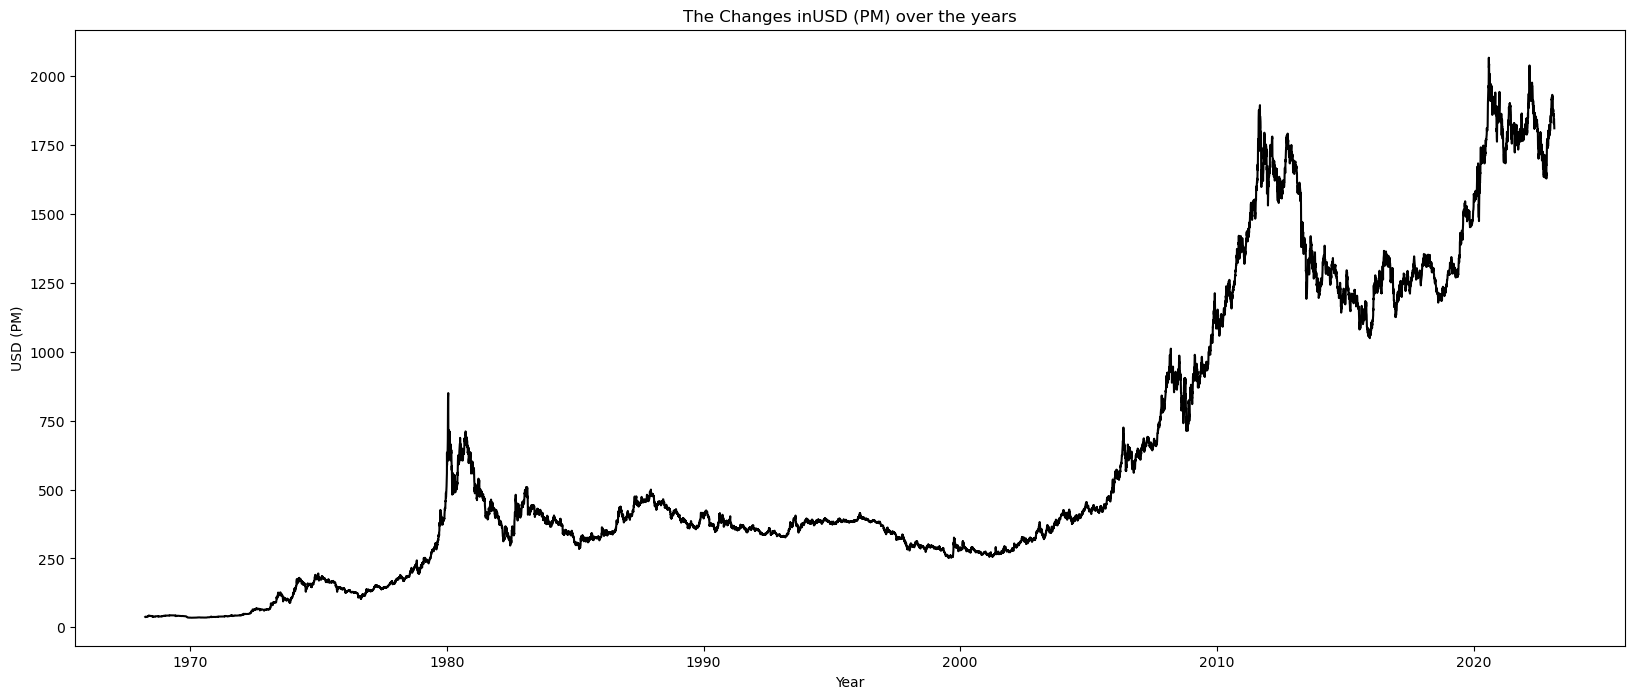

In [16]:
plot(x='Date',y='USD (PM)',color='black')

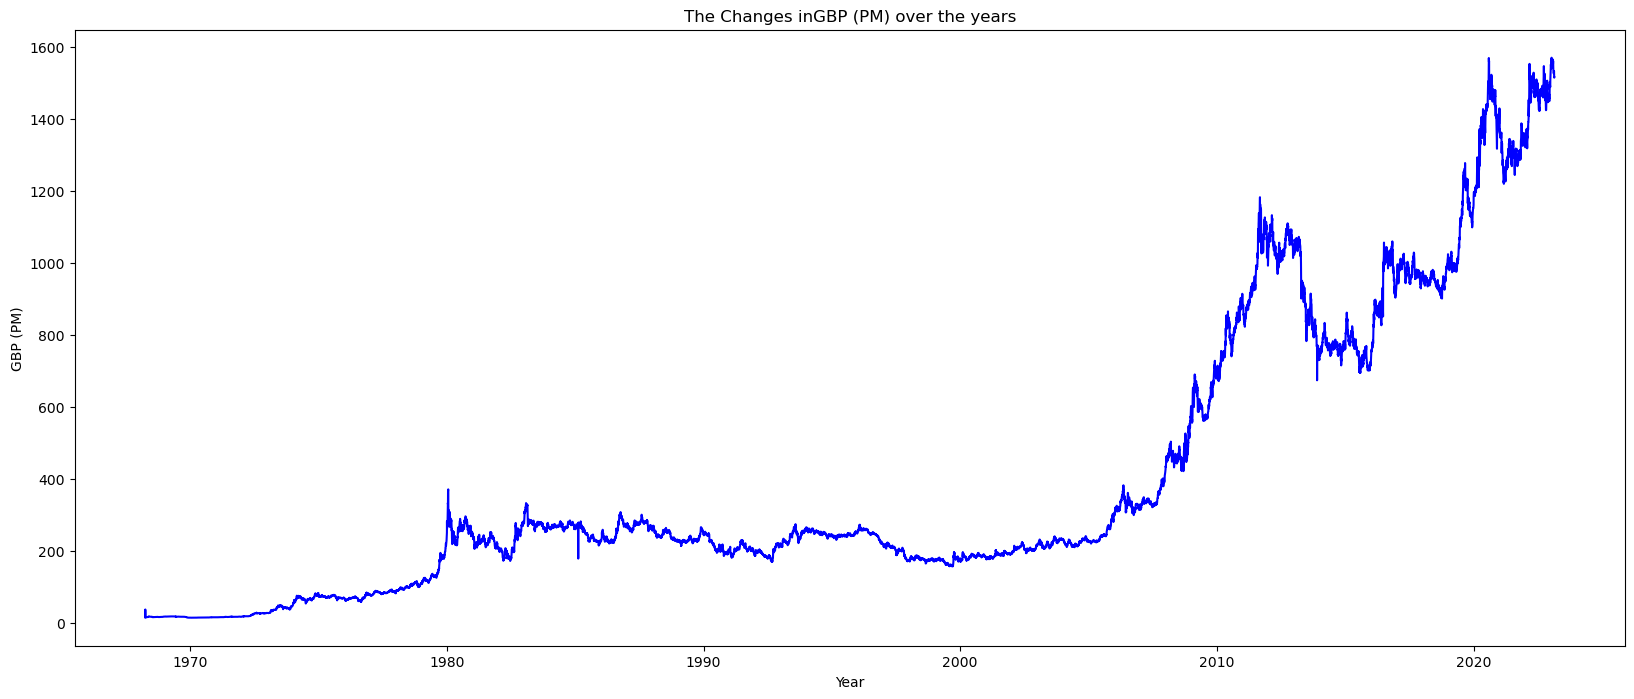

In [17]:
plot(x='Date',y='GBP (PM)',color='blue')

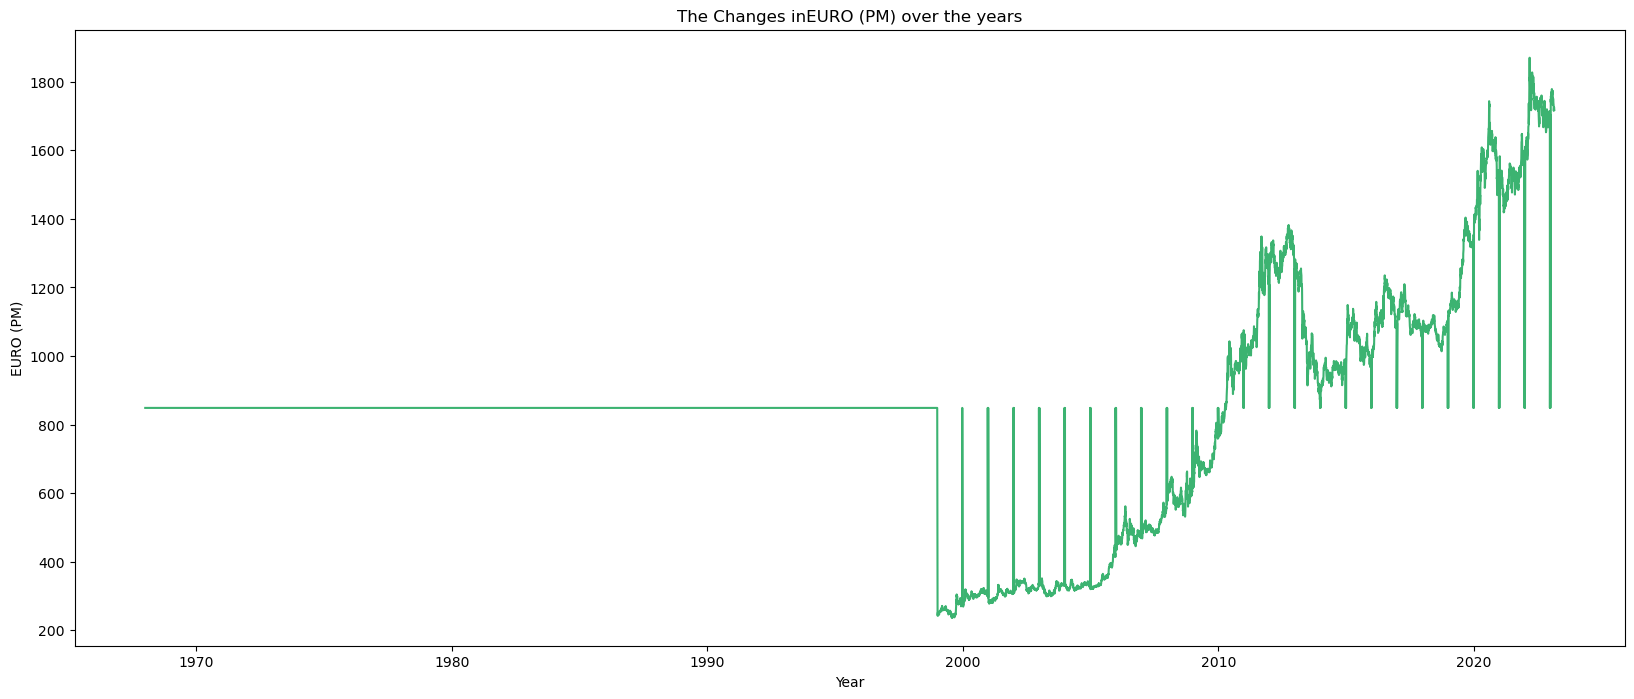

In [18]:
plot(x='Date',y='EURO (PM)',color='mediumseagreen')

"""In the year :2000 Gold prices were almost at a contsant state ,as time goes by they skyrocket . This is usually the case with 
minerals and antiques ,their value depends on their availability and it compounds pretty fast.In 2018 the prices were all 
high for all the currencies and they have been flactuating up until 2023 february"""

# Moving Averages to gain insight!!

In [19]:
df.describe()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM),USD(AM),USD(PM),GBP(AM),GBP(PM)
count,13938.000000,13792.000000,13928.000000,13781.000000,13939.000000,13939.000000,13939.000000,13939.000000,13939.000000,13939.000000
mean,606.527419,607.869120,398.128216,399.061625,849.036624,848.735233,606.527419,606.527516,398.128216,399.061625
std,521.518733,521.109568,387.813587,387.669586,299.688184,298.543417,521.500024,521.500024,387.660524,385.466028
min,34.770000,34.750000,14.485000,14.477000,237.334000,236.708000,34.770000,34.770000,14.485000,14.477000
25%,283.712500,284.387500,179.305000,179.518000,849.036624,848.735233,283.725000,283.725000,179.376000,180.231000
50%,385.150000,385.275000,238.194500,238.271000,849.036624,848.735233,385.150000,385.150000,238.233000,239.760000
75%,943.687500,945.250000,599.835500,602.578000,849.036624,848.735233,943.625000,943.625000,598.881000,580.799000
max,2061.500000,2067.150000,1586.210000,1570.410000,1849.310000,1870.220000,2061.500000,2061.500000,1586.210000,1570.410000


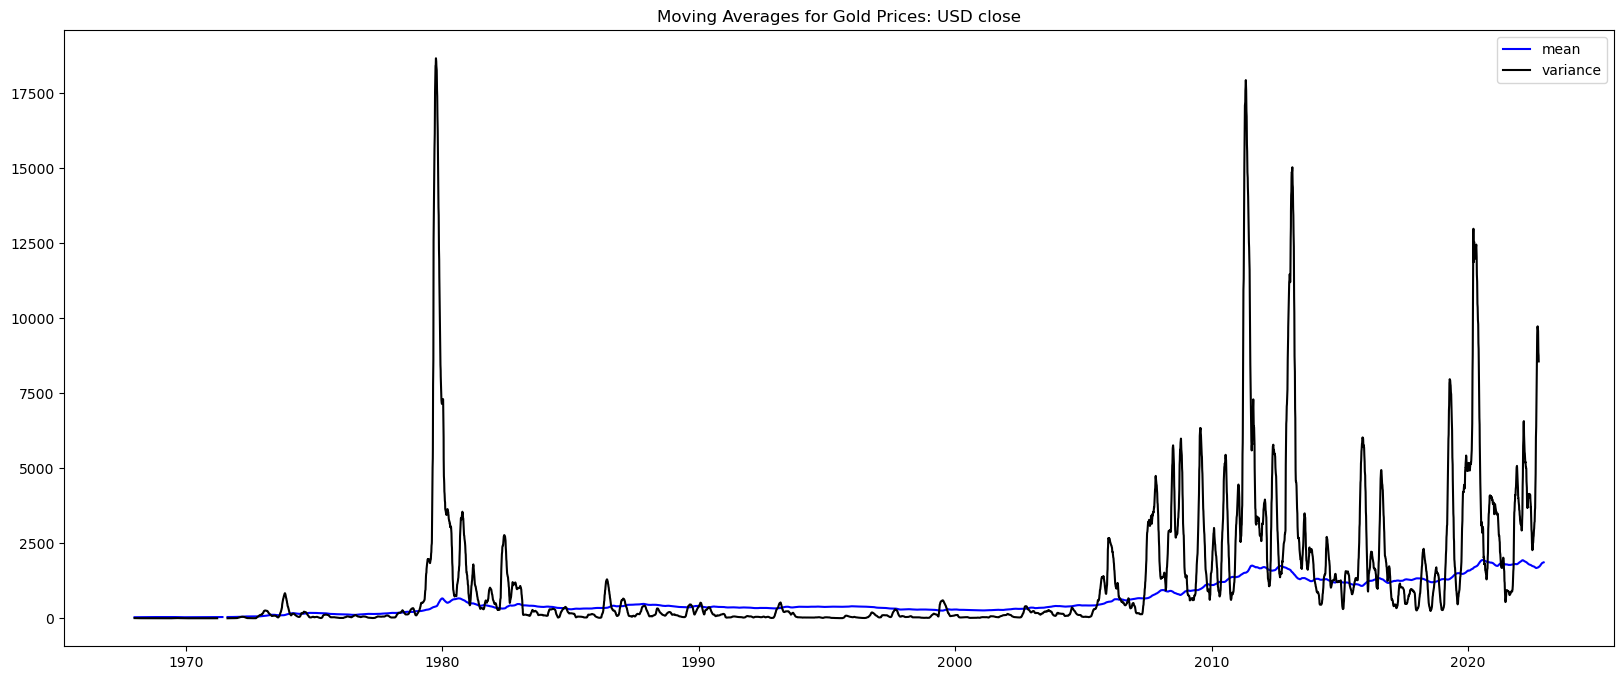

In [20]:
plt.figure(figsize=(20,8))
plt.plot(df['Date'],df['USD (AM)'].rolling(50).mean(),color='blue',label='mean')
plt.plot(df['Date'],df['USD (AM)'].rolling(100).var(),color='black',label='variance')
plt.legend()
plt.title('Moving Averages for Gold Prices: USD close')
plt.show()

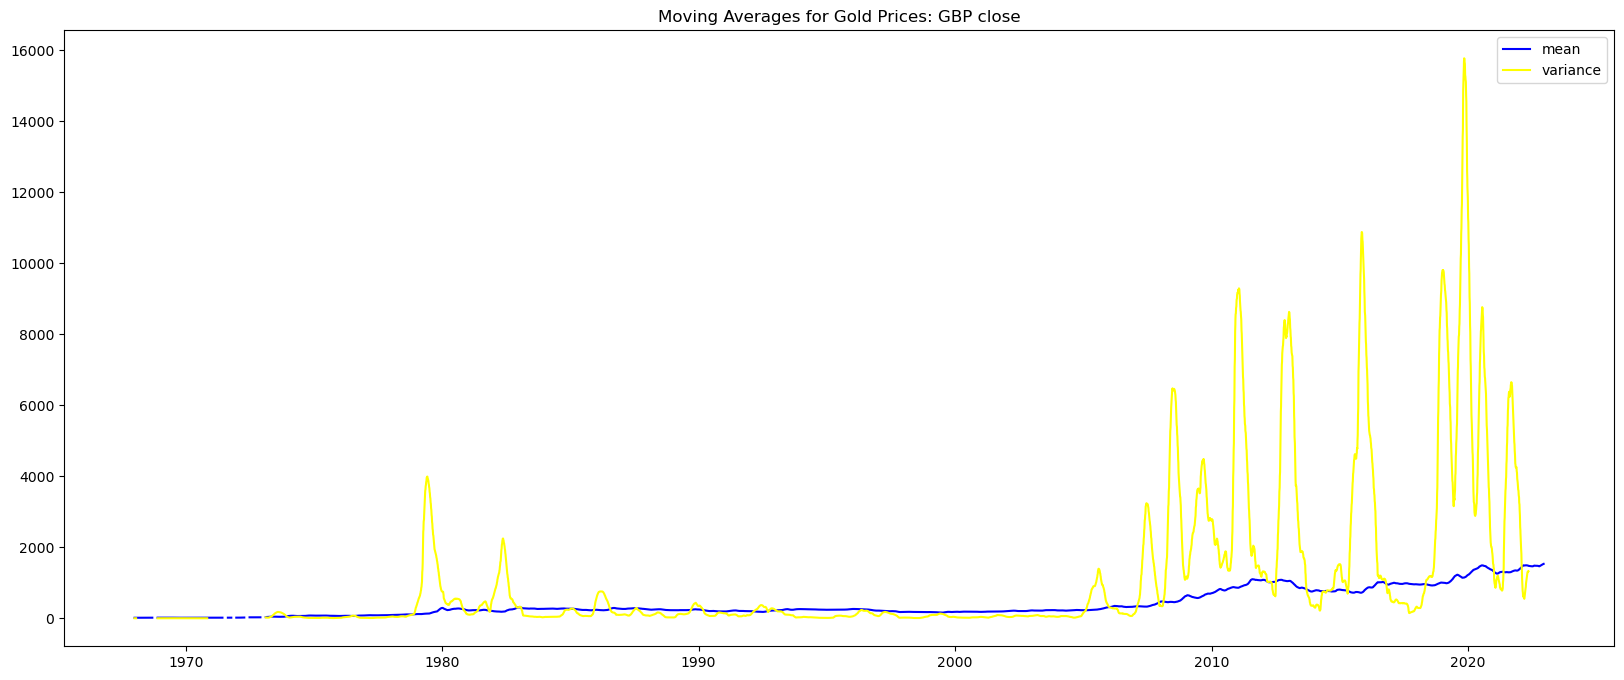

In [21]:
plt.figure(figsize=(20,8))
plt.plot(df['Date'],df['GBP (AM)'].rolling(50).mean(),color='blue',label='mean')
plt.plot(df['Date'],df['GBP (AM)'].rolling(200).var(),color='yellow',label='variance')
plt.legend()
plt.title('Moving Averages for Gold Prices: GBP close')
plt.show()

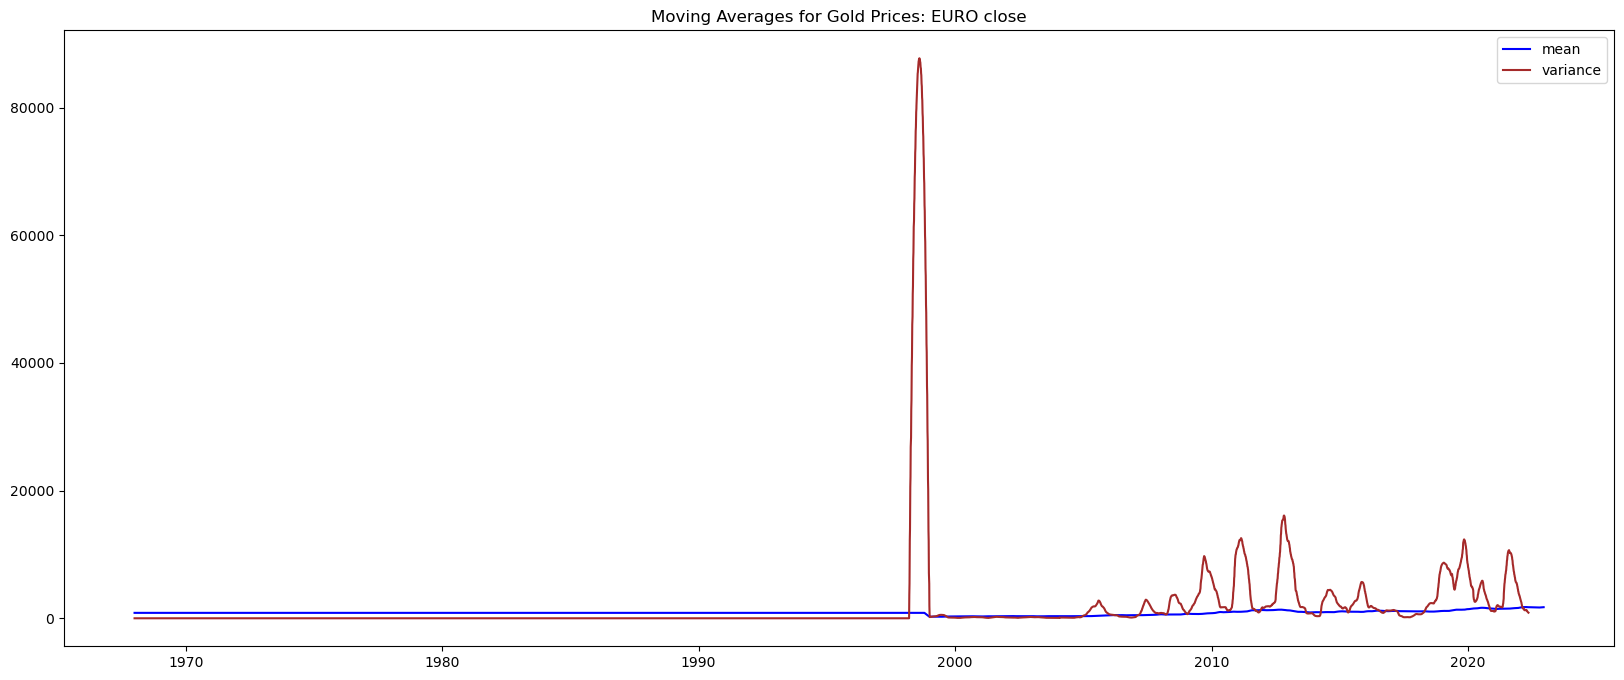

In [22]:
plt.figure(figsize=(20,8))
plt.plot(df['Date'],df['EURO (AM)'].rolling(50).mean(),color='blue',label='mean')
plt.plot(df['Date'],df['EURO (AM)'].rolling(200).var(),color='brown',label='variance')
plt.legend()
plt.title('Moving Averages for Gold Prices: EURO close')
plt.show()

 The prices are highly volatile as shown by the high variances , we cant pinpoint the exact price change:
 The USD price has the highest variances and so I will study it in prefence to other currencies in my dataset

In [23]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [24]:
def stationarity_test(timeseries):
    from statsmodels.tsa.stattools import adfuller
    print ('The results of Dickey Fuller test')
    print('=====================================')
    dftest = adfuller(timeseries,autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','lags used','number of observations'])
    for key,value in dftest[4].items():
        dfoutput['Critical value(%s)'%key] = value
        print(dfoutput)
        
def stationarity_test(ts):
    from statsmodels.tsa.stattools import adfuller
    print('The results of the Dickey Fuller Test')
    print("=====================================")
    dftest = adfuller(ts,autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','lags used','number of observations'])
    for key,value in dftest[4].items():
        dfoutput['Critical value(%s)'%key] = value
        print(dfoutput)

In [25]:
usd =df [['Date','USD (AM)']]

In [26]:
usd = usd.set_index('Date')

In [27]:
usd

,USD (AM)
Date,
2023-02-24,1824.10
2023-02-23,1826.95
2023-02-22,1833.45
2023-02-21,1833.20
2023-02-20,1844.20
...,...
1968-01-08,35.14
1968-01-05,35.14
1968-01-04,35.14


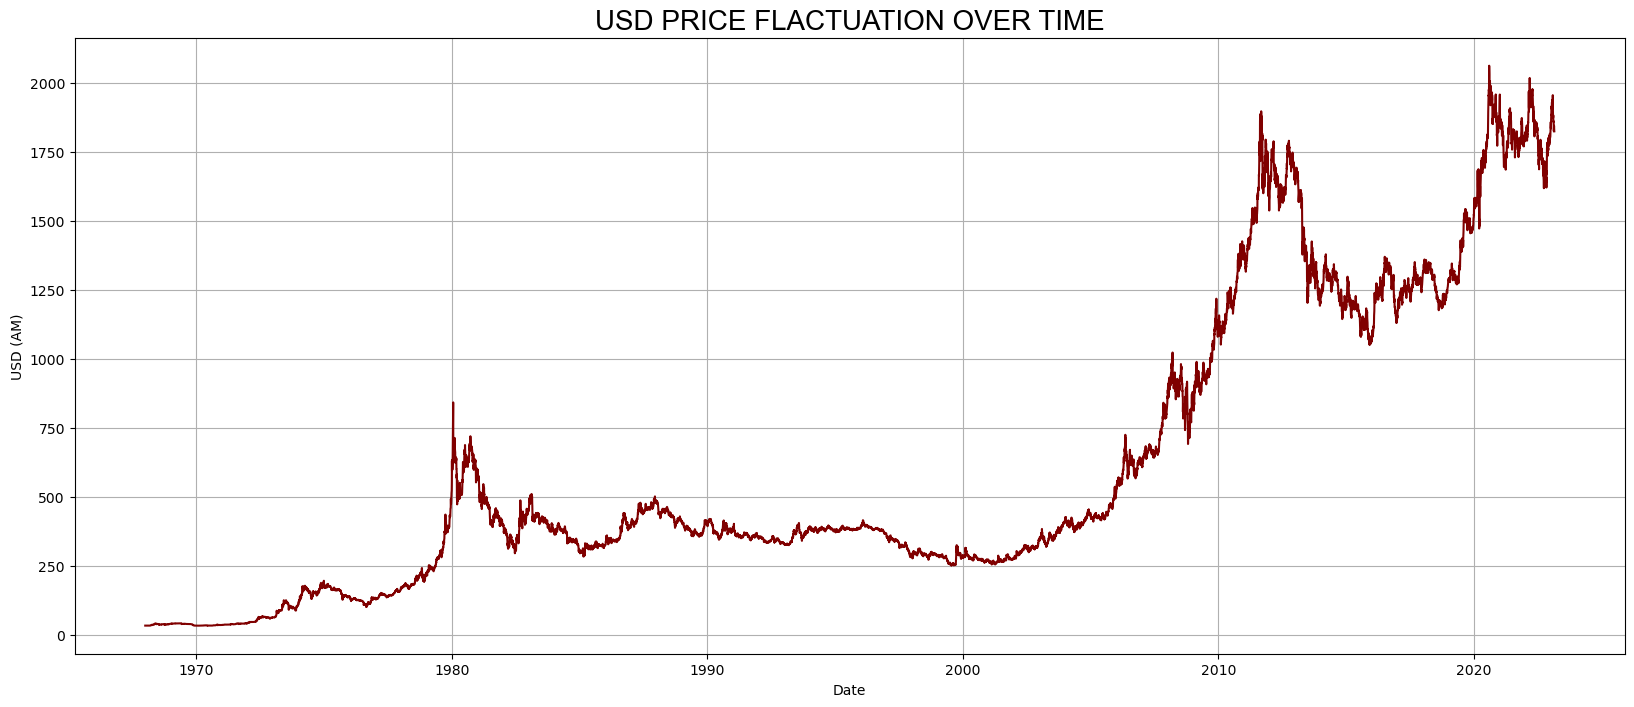

In [28]:
plt.figure(figsize=(20,8))
sns.lineplot(x='Date',y='USD (AM)',data=usd,color='maroon')
plt.title('USD PRICE FLACTUATION OVER TIME',font ='Arial',size=20)
plt.grid()
plt.show()

In [29]:
type(usd)

pandas.core.frame.DataFrame

In [30]:
usd = usd['USD (AM)']

In [31]:
type(usd)

pandas.core.series.Series

In [36]:
usd.dropna()

Date
2023-02-24    1824.10
2023-02-23    1826.95
2023-02-22    1833.45
2023-02-21    1833.20
2023-02-20    1844.20
               ...   
1968-01-08      35.14
1968-01-05      35.14
1968-01-04      35.14
1968-01-03      35.16
1968-01-02      35.18
Name: USD (AM), Length: 13938, dtype: float64

# Min Max Scaling and LSTM 

In [39]:
scaler = MinMaxScaler()

In [48]:
price = df['USD (AM)'].values.reshape(-1,1)

In [49]:
price = scaler.fit_transform(price)

In [50]:
price

array([[8.82865503e-01],
       [8.84271709e-01],
       [8.87478845e-01],
       ...,
       [1.82560084e-04],
       [1.92428197e-04],
       [2.02296310e-04]])

In [53]:
price = torch.from_numpy(price).type(torch.Tensor)

In [54]:
price

tensor([[8.8287e-01],
        [8.8427e-01],
        [8.8748e-01],
        ...,
        [1.8256e-04],
        [1.9243e-04],
        [2.0230e-04]])

In [60]:
def split_data(stock,lookback):
    data_raw = stock
    data= []
    #We will create all sequences of lenght
    for index in range(len(data_raw)-lookback):
        data.append(data_raw[index:index+lookback])
        data=np.array(data);
        test_set_size = int(np.round(0.3*data.shape[0]));
        train_set_size = int(np.round(data.shape[0]-(test_set_size)));
        x_train = data[:train_set_size,:-1,:]
        y_train = data[:train_set_size,:-1,:]
        x_test = data[train_set_size:,:-1]
        y_test = data[train_set_size:,:-1]
        return [x_train,y_train,x_test,y_test]
    

In [61]:
lookback = 20
x_train,y_train,x_test,y_test = split_data(price,lookback)

C:\Users\EDGAR MUYALE DAVIES\AppData\Local\Temp\ipykernel_8576\2624132574.py:7: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  data=np.array(data);


ValueError: only one element tensors can be converted to Python scalars

In [59]:
x_train = torch.from_numpy(x_train).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train = torch.from_numpy(y_test).type(torch.Tensor)

NameError: name 'x_train' is not defined